In [119]:


import numpy as np 
import pandas as pd 
import os 
os.chdir('/Users/Abhi/Downloads/')

In [58]:
train=pd.read_csv('train-3.csv')
test=pd.read_csv('test-3.csv')

In [59]:
train.shape

(909604, 16)

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


<AxesSubplot:xlabel='Target', ylabel='Density'>

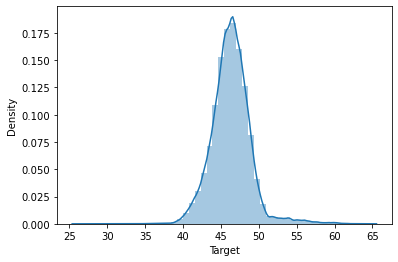

In [5]:
sns.distplot(train.Target)

In [6]:
train.describe()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
count,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000
mean,525.886061,537.639468,25.573921,931.130882,60.730112,527.579537,31.755823,31.686413,111.080610,133.692333,199.487161,5.894950,0.651916,46.328595
std,474.619576,482.394907,8.025649,193.674384,9.721582,472.656976,3.929794,3.554426,78.219944,91.232152,104.617261,1.977684,0.317513,2.617691
min,0.000000,0.000008,5.616541,0.000000,25.636366,0.000000,11.141922,16.010218,-318.393721,-5.461607,0.309692,0.904500,0.000000,25.865320
25%,149.620898,155.813244,17.093680,770.538574,54.916767,147.181552,29.913803,30.267423,81.540850,96.045765,98.916060,4.400753,0.432129,44.816740
50%,379.989929,383.985926,27.919035,884.068502,60.034490,391.303187,31.762946,31.961610,92.005826,107.633378,232.821159,5.637207,0.583863,46.302899
75%,781.357475,800.261108,32.171696,1123.335856,65.737187,794.875710,33.469745,33.546260,124.879153,154.153730,287.667503,7.092771,0.798240,47.733105
max,1999.999858,1999.984456,48.089017,1267.140625,129.846405,1999.991455,52.790030,48.406106,523.892695,592.815938,359.455531,19.795001,9.534769,65.037689


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

# Some of the values are postive ,zero and negative 
# This hints since the data has differnt scales and it will not do good pattern capture
# Therfore  , we will need to scale or transform the data 

array([[<AxesSubplot:title={'center':'active_power_calculated_by_converter'}>,
        <AxesSubplot:title={'center':'active_power_raw'}>,
        <AxesSubplot:title={'center':'ambient_temperature'}>,
        <AxesSubplot:title={'center':'generator_speed'}>],
       [<AxesSubplot:title={'center':'generator_winding_temp_max'}>,
        <AxesSubplot:title={'center':'grid_power10min_average'}>,
        <AxesSubplot:title={'center':'nc1_inside_temp'}>,
        <AxesSubplot:title={'center':'nacelle_temp'}>],
       [<AxesSubplot:title={'center':'reactice_power_calculated_by_converter'}>,
        <AxesSubplot:title={'center':'reactive_power'}>,
        <AxesSubplot:title={'center':'wind_direction_raw'}>,
        <AxesSubplot:title={'center':'wind_speed_raw'}>],
       [<AxesSubplot:title={'center':'wind_speed_turbulence'}>,
        <AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

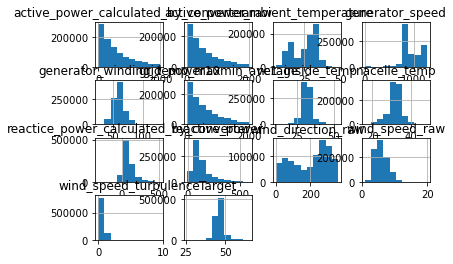

In [8]:
train.hist()

In [9]:
train.shape

(909604, 16)

In [60]:
train['Day']=pd.DatetimeIndex(train.timestamp).day
train['Month']=pd.DatetimeIndex(train.timestamp).month
train['Year']=pd.DatetimeIndex(train.timestamp).year
train['Hour']=pd.DatetimeIndex(train.timestamp).hour
train['Minute']=pd.DatetimeIndex(train.timestamp).minute
train['Weekday']=pd.DatetimeIndex(train.timestamp).weekday

In [61]:
test['Day']=pd.DatetimeIndex(test.timestamp).day
test['Month']=pd.DatetimeIndex(test.timestamp).month
test['Year']=pd.DatetimeIndex(test.timestamp).year
test['Hour']=pd.DatetimeIndex(test.timestamp).hour
test['Minute']=pd.DatetimeIndex(test.timestamp).minute
test['Weekday']=pd.DatetimeIndex(test.timestamp).weekday

In [62]:
newtrain=train.drop(['timestamp','Year','turbine_id','Target'],axis=1)
target=train.Target
test.drop(['timestamp','Year'],axis=1,inplace=True)

In [13]:
newtrain.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Day,Month,Hour,Minute,Weekday
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,19,2,20,18,4
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,27,4,4,55,1
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,25,1,6,26,0
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,30,10,3,47,5
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,15,3,0,39,0


In [14]:
newtrain.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence', 'Day',
       'Month', 'Hour', 'Minute', 'Weekday'],
      dtype='object')

# Feature Engineering 
* Nacelle Temperature
* Active Power
* Reactive Power

In [65]:
newtrain['diff_active_power']=newtrain['active_power_raw']-newtrain['active_power_calculated_by_converter']
test['diff_active_power']=test['active_power_raw']-test['active_power_calculated_by_converter']
newtrain['diff_nacelle_temp']=newtrain['nacelle_temp']-newtrain['nc1_inside_temp']
test['diff_nacelle_temp']=test['nacelle_temp']-test['nc1_inside_temp']
newtrain['diff_reactive_power']=newtrain['reactive_power']-newtrain['reactice_power_calculated_by_converter']
test['diff_reactive_power']=test['reactive_power']-test['reactice_power_calculated_by_converter']

In [16]:
newtrain.describe()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,...,wind_speed_raw,wind_speed_turbulence,Day,Month,Hour,Minute,Weekday,diff_active_power,diff_nacelle_temp,diff_reactive_power
count,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,...,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000
mean,525.886061,537.639468,25.573921,931.130882,60.730112,527.579537,31.755823,31.686413,111.080610,133.692333,...,5.894950,0.651916,15.666497,6.595061,11.391357,29.494714,3.029488,11.753407,-0.069410,22.611723
std,474.619576,482.394907,8.025649,193.674384,9.721582,472.656976,3.929794,3.554426,78.219944,91.232152,...,1.977684,0.317513,8.837173,3.401293,7.028642,17.490660,2.007906,41.145612,2.958234,16.269664
min,0.000000,0.000008,5.616541,0.000000,25.636366,0.000000,11.141922,16.010218,-318.393721,-5.461607,...,0.904500,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1626.539569,-7.805130,-245.480583
25%,149.620898,155.813244,17.093680,770.538574,54.916767,147.181552,29.913803,30.267423,81.540850,96.045765,...,4.400753,0.432129,8.000000,4.000000,5.000000,14.000000,1.000000,-4.640493,-2.681466,11.744247
50%,379.989929,383.985926,27.919035,884.068502,60.034490,391.303187,31.762946,31.961610,92.005826,107.633378,...,5.637207,0.583863,16.000000,7.000000,11.000000,30.000000,3.000000,5.365747,-0.434664,19.978813
75%,781.357475,800.261108,32.171696,1123.335856,65.737187,794.875710,33.469745,33.546260,124.879153,154.153730,...,7.092771,0.798240,23.000000,9.000000,18.000000,45.000000,5.000000,21.194461,2.080702,31.365818
max,1999.999858,1999.984456,48.089017,1267.140625,129.846405,1999.991455,52.790030,48.406106,523.892695,592.815938,...,19.795001,9.534769,31.000000,12.000000,23.000000,59.000000,6.000000,1829.804627,12.387167,492.170963


In [17]:
newtrain.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence', 'Day',
       'Month', 'Hour', 'Minute', 'Weekday', 'diff_active_power',
       'diff_nacelle_temp', 'diff_reactive_power'],
      dtype='object')

In [18]:
#  Random Forest Model
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import catboost as cboost

In [19]:
# Create Model Instances 
rf=RandomForestRegressor(random_state=494)
etr=ExtraTreesRegressor(n_estimator=250,random_state=250)
lgbm=LGBMRegressor(random_state=494)
xgbr=XGBRegressor(random_state=500)
cbr=cboost.CatBoostRegressor(random_state=12)

In [20]:
# Fit and predict
pred_rf=rf.fit(newtrain,target).predict(test.drop('turbine_id',axis=1))

In [21]:
submission=pd.DataFrame({'Target':pred_rf})
submission.to_csv('RFModel.csv',index=False) # Random Forest: MAPE-0.00724

# Log Transformation

In [63]:
# Log Transformation
features=['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence', 'diff_active_power',
       'diff_nacelle_temp', 'diff_reactive_power']

In [23]:
# Has -ve, 0 and +ve....


In [67]:
for i in features:
    newtrain[i]=newtrain[i].apply(lambda x:0.000001 if x <=0 else x)
    newtrain[i]=np.log(newtrain[i])

In [68]:
for i in features:
    test[i]=test[i].apply(lambda x:0.000001 if x <=0 else x)
    test[i]=np.log(test[i])

In [26]:
# Turbine ID 


In [27]:
train.turbine_id.unique()

array(['Turbine_108', 'Turbine_18', 'Turbine_105', 'Turbine_15',
       'Turbine_01', 'Turbine_14', 'Turbine_10', 'Turbine_103',
       'Turbine_123', 'Turbine_120', 'Turbine_139', 'Turbine_97',
       'Turbine_19', 'Turbine_20', 'Turbine_13', 'Turbine_158'],
      dtype=object)

In [28]:
test.turbine_id.unique()

array(['Turbine_14', 'Turbine_19', 'Turbine_120', 'Turbine_158',
       'Turbine_13', 'Turbine_139', 'Turbine_105', 'Turbine_20',
       'Turbine_103', 'Turbine_10', 'Turbine_01', 'Turbine_18',
       'Turbine_97', 'Turbine_123', 'Turbine_15', 'Turbine_108'],
      dtype=object)

In [69]:
 encoded=train.groupby('turbine_id')['Target'].mean()

In [70]:
# Lets map the train and The test 
newtrain['turbine_id']=train.turbine_id.map(encoded)
test['turbine_id']=test.turbine_id.map(encoded)

In [71]:
newtrain.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,...,wind_speed_turbulence,Day,Month,Hour,Minute,Weekday,diff_active_power,diff_nacelle_temp,diff_reactive_power,turbine_id
0,1.902883,1.906179,1.240152,1.953856,1.432453,1.920165,1.241858,1.238414,1.599792,1.631000,...,-13.815511,19,2,20,18,4,-3.810452,-13.815511,-1.851637,46.549006
1,1.798094,1.798860,0.938770,1.921886,1.407854,1.808177,1.246713,1.249638,1.502015,1.554929,...,-13.815511,27,4,4,55,1,-5.376186,-4.586413,-1.410493,45.178387
2,1.970301,1.973888,1.034007,1.958839,1.414711,1.976675,0.891061,1.067707,1.693923,1.729877,...,-13.815511,25,1,6,26,0,-3.658340,-0.752924,-1.613539,46.585878
3,1.415599,1.381113,1.207757,1.894036,1.309845,0.979077,1.262368,1.248824,1.433380,1.462728,...,-13.815511,30,10,3,47,5,-13.815511,-13.815511,-2.080442,46.388378
4,1.854118,1.858822,1.238550,1.939260,1.426526,1.855563,1.246553,1.238061,1.593548,1.624610,...,-13.815511,15,3,0,39,0,-3.502775,-13.815511,-1.862646,49.288458


In [72]:
# Feature Selection using RFE 
from sklearn.feature_selection import RFECV

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()

In [74]:
selector=RFECV(estimator=dtree,step=1,cv=5,verbose=5,n_jobs=-1,scoring='neg_mean_absolute_percentage_error'
              ,min_features_to_select=5)

In [ ]:
#selector.fit(newtrain,target)


feat_names=list(selector.get_feature_names_out())
print(feat_names)

In [40]:
newtrain.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence', 'Day',
       'Month', 'Hour', 'Minute', 'Weekday', 'diff_active_power',
       'diff_nacelle_temp', 'diff_reactive_power', 'turbine_id'],
      dtype='object')

In [75]:
rfetrain=newtrain.loc[:,['nacelle_temp','ambient_temperature','turbine_id','Hour','Day','Month']]
rfetest=test.loc[:,['nacelle_temp','ambient_temperature','turbine_id','Hour','Day','Month']]

# Ensembles 
* Split the data  in train and test
* build my models -Extra Tree, Cat Boost ,XGB,LightGBM, and Rf
* Take the ensemble and find the Median Predicted value and submit it 

In [85]:
rf=RandomForestRegressor(random_state=42)
etr=ExtraTreesRegressor(n_estimators=200,random_state=123)
lgbm=LGBMRegressor(random_state=494)
xgbr=XGBRegressor(random_state=500)
cbr=cboost.CatBoostRegressor(random_state=0)

In [77]:
# Train Test Split 
from sklearn.model_selection import train_test_split

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(rfetrain,target,test_size=0.20,random_state=598,
                                           stratify=train['turbine_id'])

In [79]:
xtrain.isnull().sum()

nacelle_temp           0
ambient_temperature    0
turbine_id             0
Hour                   0
Day                    0
Month                  0
dtype: int64

In [49]:
# Building the ensemble Model

In [86]:
from sklearn.metrics import mean_absolute_percentage_error

final_prediction=[]


for model,names in zip([rf,etr,lgbm,xgbr,cbr],
                       ['rf','etr','lgbm','xgbr','cbr']):
# Fit the model and find the MAPE of each model 

    pred=model.fit(xtrain,ytrain).predict(xtest)
# Print The MAPE for each model
    print('{} MAPE is : '.format(names,mean_absolute_percentage_error(ytest,pred)))

# Final prediction on the test 

    final_prediction.append(model.predict(rfetest))


rf MAPE is : 
etr MAPE is : 
lgbm MAPE is : 
xgbr MAPE is : 
Learning rate set to 0.126132
0:	learn: 2.4172923	total: 99.3ms	remaining: 1m 39s
1:	learn: 2.2429508	total: 142ms	remaining: 1m 10s
2:	learn: 2.0954687	total: 168ms	remaining: 56s
3:	learn: 1.9713360	total: 190ms	remaining: 47.3s
4:	learn: 1.8827465	total: 211ms	remaining: 42s
5:	learn: 1.7911185	total: 232ms	remaining: 38.4s
6:	learn: 1.7134401	total: 256ms	remaining: 36.3s
7:	learn: 1.6582377	total: 276ms	remaining: 34.2s
8:	learn: 1.6084561	total: 297ms	remaining: 32.7s
9:	learn: 1.5569318	total: 318ms	remaining: 31.5s
10:	learn: 1.5118267	total: 346ms	remaining: 31.1s
11:	learn: 1.4766620	total: 367ms	remaining: 30.2s
12:	learn: 1.4379134	total: 389ms	remaining: 29.5s
13:	learn: 1.4153218	total: 408ms	remaining: 28.8s
14:	learn: 1.3833117	total: 429ms	remaining: 28.2s
15:	learn: 1.3668255	total: 450ms	remaining: 27.6s
16:	learn: 1.3499600	total: 469ms	remaining: 27.1s
17:	learn: 1.3287552	total: 490ms	remaining: 26.7s
18

166:	learn: 0.9804471	total: 3.96s	remaining: 19.8s
167:	learn: 0.9794171	total: 3.99s	remaining: 19.8s
168:	learn: 0.9788770	total: 4.01s	remaining: 19.7s
169:	learn: 0.9780036	total: 4.03s	remaining: 19.7s
170:	learn: 0.9774068	total: 4.05s	remaining: 19.6s
171:	learn: 0.9767076	total: 4.07s	remaining: 19.6s
172:	learn: 0.9761848	total: 4.09s	remaining: 19.6s
173:	learn: 0.9756056	total: 4.11s	remaining: 19.5s
174:	learn: 0.9752751	total: 4.13s	remaining: 19.5s
175:	learn: 0.9746575	total: 4.16s	remaining: 19.5s
176:	learn: 0.9738320	total: 4.18s	remaining: 19.4s
177:	learn: 0.9731312	total: 4.2s	remaining: 19.4s
178:	learn: 0.9725967	total: 4.22s	remaining: 19.4s
179:	learn: 0.9720485	total: 4.24s	remaining: 19.3s
180:	learn: 0.9716927	total: 4.26s	remaining: 19.3s
181:	learn: 0.9712976	total: 4.29s	remaining: 19.3s
182:	learn: 0.9704744	total: 4.31s	remaining: 19.2s
183:	learn: 0.9700359	total: 4.33s	remaining: 19.2s
184:	learn: 0.9695067	total: 4.35s	remaining: 19.2s
185:	learn: 0

325:	learn: 0.9069246	total: 7.6s	remaining: 15.7s
326:	learn: 0.9065531	total: 7.63s	remaining: 15.7s
327:	learn: 0.9058645	total: 7.65s	remaining: 15.7s
328:	learn: 0.9056616	total: 7.67s	remaining: 15.7s
329:	learn: 0.9054832	total: 7.7s	remaining: 15.6s
330:	learn: 0.9051933	total: 7.72s	remaining: 15.6s
331:	learn: 0.9051034	total: 7.75s	remaining: 15.6s
332:	learn: 0.9048429	total: 7.77s	remaining: 15.6s
333:	learn: 0.9045974	total: 7.79s	remaining: 15.5s
334:	learn: 0.9043452	total: 7.82s	remaining: 15.5s
335:	learn: 0.9040773	total: 7.84s	remaining: 15.5s
336:	learn: 0.9037223	total: 7.87s	remaining: 15.5s
337:	learn: 0.9033901	total: 7.89s	remaining: 15.5s
338:	learn: 0.9027899	total: 7.91s	remaining: 15.4s
339:	learn: 0.9024553	total: 7.94s	remaining: 15.4s
340:	learn: 0.9023195	total: 7.96s	remaining: 15.4s
341:	learn: 0.9020722	total: 7.99s	remaining: 15.4s
342:	learn: 0.9019522	total: 8.01s	remaining: 15.3s
343:	learn: 0.9017154	total: 8.03s	remaining: 15.3s
344:	learn: 0.

487:	learn: 0.8676039	total: 11.4s	remaining: 12s
488:	learn: 0.8674764	total: 11.5s	remaining: 12s
489:	learn: 0.8673185	total: 11.5s	remaining: 12s
490:	learn: 0.8671065	total: 11.5s	remaining: 11.9s
491:	learn: 0.8668386	total: 11.5s	remaining: 11.9s
492:	learn: 0.8666484	total: 11.6s	remaining: 11.9s
493:	learn: 0.8664373	total: 11.6s	remaining: 11.9s
494:	learn: 0.8662616	total: 11.6s	remaining: 11.8s
495:	learn: 0.8660889	total: 11.6s	remaining: 11.8s
496:	learn: 0.8659300	total: 11.6s	remaining: 11.8s
497:	learn: 0.8656675	total: 11.7s	remaining: 11.8s
498:	learn: 0.8654103	total: 11.7s	remaining: 11.7s
499:	learn: 0.8652505	total: 11.7s	remaining: 11.7s
500:	learn: 0.8650305	total: 11.7s	remaining: 11.7s
501:	learn: 0.8648685	total: 11.8s	remaining: 11.7s
502:	learn: 0.8647663	total: 11.8s	remaining: 11.6s
503:	learn: 0.8645510	total: 11.8s	remaining: 11.6s
504:	learn: 0.8643615	total: 11.8s	remaining: 11.6s
505:	learn: 0.8642208	total: 11.9s	remaining: 11.6s
506:	learn: 0.8638

651:	learn: 0.8394962	total: 15.3s	remaining: 8.15s
652:	learn: 0.8393328	total: 15.3s	remaining: 8.13s
653:	learn: 0.8389716	total: 15.3s	remaining: 8.11s
654:	learn: 0.8388893	total: 15.3s	remaining: 8.08s
655:	learn: 0.8388150	total: 15.4s	remaining: 8.06s
656:	learn: 0.8387061	total: 15.4s	remaining: 8.04s
657:	learn: 0.8385547	total: 15.4s	remaining: 8.01s
658:	learn: 0.8384289	total: 15.4s	remaining: 7.99s
659:	learn: 0.8383290	total: 15.5s	remaining: 7.96s
660:	learn: 0.8380948	total: 15.5s	remaining: 7.94s
661:	learn: 0.8380738	total: 15.5s	remaining: 7.92s
662:	learn: 0.8378149	total: 15.5s	remaining: 7.9s
663:	learn: 0.8377432	total: 15.6s	remaining: 7.87s
664:	learn: 0.8376387	total: 15.6s	remaining: 7.85s
665:	learn: 0.8375328	total: 15.6s	remaining: 7.83s
666:	learn: 0.8374037	total: 15.6s	remaining: 7.8s
667:	learn: 0.8371326	total: 15.7s	remaining: 7.78s
668:	learn: 0.8370605	total: 15.7s	remaining: 7.76s
669:	learn: 0.8368728	total: 15.7s	remaining: 7.73s
670:	learn: 0.

813:	learn: 0.8161274	total: 19.2s	remaining: 4.38s
814:	learn: 0.8160447	total: 19.2s	remaining: 4.36s
815:	learn: 0.8159365	total: 19.2s	remaining: 4.33s
816:	learn: 0.8158102	total: 19.3s	remaining: 4.31s
817:	learn: 0.8157390	total: 19.3s	remaining: 4.29s
818:	learn: 0.8156554	total: 19.3s	remaining: 4.26s
819:	learn: 0.8155200	total: 19.3s	remaining: 4.24s
820:	learn: 0.8154796	total: 19.4s	remaining: 4.22s
821:	learn: 0.8153399	total: 19.4s	remaining: 4.2s
822:	learn: 0.8152739	total: 19.4s	remaining: 4.17s
823:	learn: 0.8150815	total: 19.4s	remaining: 4.15s
824:	learn: 0.8150112	total: 19.4s	remaining: 4.13s
825:	learn: 0.8147649	total: 19.5s	remaining: 4.1s
826:	learn: 0.8145985	total: 19.5s	remaining: 4.08s
827:	learn: 0.8145146	total: 19.5s	remaining: 4.05s
828:	learn: 0.8144088	total: 19.5s	remaining: 4.03s
829:	learn: 0.8141836	total: 19.6s	remaining: 4.01s
830:	learn: 0.8140906	total: 19.6s	remaining: 3.98s
831:	learn: 0.8140329	total: 19.6s	remaining: 3.96s
832:	learn: 0.

975:	learn: 0.7969516	total: 23.1s	remaining: 567ms
976:	learn: 0.7964712	total: 23.1s	remaining: 544ms
977:	learn: 0.7963079	total: 23.1s	remaining: 520ms
978:	learn: 0.7961784	total: 23.1s	remaining: 496ms
979:	learn: 0.7960149	total: 23.2s	remaining: 473ms
980:	learn: 0.7959838	total: 23.2s	remaining: 449ms
981:	learn: 0.7959322	total: 23.2s	remaining: 425ms
982:	learn: 0.7959064	total: 23.2s	remaining: 402ms
983:	learn: 0.7958180	total: 23.3s	remaining: 378ms
984:	learn: 0.7956729	total: 23.3s	remaining: 355ms
985:	learn: 0.7956055	total: 23.3s	remaining: 331ms
986:	learn: 0.7954931	total: 23.3s	remaining: 307ms
987:	learn: 0.7954578	total: 23.4s	remaining: 284ms
988:	learn: 0.7953695	total: 23.4s	remaining: 260ms
989:	learn: 0.7953074	total: 23.4s	remaining: 236ms
990:	learn: 0.7952683	total: 23.4s	remaining: 213ms
991:	learn: 0.7951926	total: 23.5s	remaining: 189ms
992:	learn: 0.7950760	total: 23.5s	remaining: 165ms
993:	learn: 0.7949490	total: 23.5s	remaining: 142ms
994:	learn: 

In [98]:
verdict=pd.DataFrame(final_prediction).T
mast_prediction=np.median(verdict,axis=1)
submission=pd.DataFrame({'Target':mast_prediction})
submission.to_csv('Ensemble_Model1.csv',index=False)

In [99]:
mast_prediction

array([50.02238948, 46.54196167, 50.16076042, ..., 48.24037692,
       48.60243988, 47.11912846])

In [100]:
# Summary of the models 
# Taking Date time and Diffrence between the temp,active power, reactive power 
# Mean encoding 
submission.to_csv('Model1.csv',index=False)

/Users/abhi


In [103]:
rf=RandomForestRegressor(random_state=42)

In [104]:
pred=rf.fit(rfetrain,target).predict(rfetest)

In [106]:
submissio=pd.DataFrame({'Target':pred})
submissio.to_csv('rfModel1.csv',index=False)

In [109]:
submissio.to_csv('rfModel1.csv',index=False)

In [112]:
from sklearn.model_selection import GridSearchCV
param={'boosting_type':['gbdt','dart','goss'],'max_depth':[10,12,14,16],'learning_rate':[0.001,0.01,0.1],
      'n_estimators':[200]}
gscv=GridSearchCV(estimator=lgbm,param_grid=param)
gscv.fit(rfetrain,target)

GridSearchCV(estimator=LGBMRegressor(random_state=494),
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss'],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [10, 12, 14, 16], 'n_estimators': [200]})

In [113]:
gscv.best_params_




{'boosting_type': 'goss',
 'learning_rate': 0.1,
 'max_depth': 16,
 'n_estimators': 200}

In [116]:
lgbm=LGBMRegressor(boosting_type= 'goss',
 learning_rate= 0.1,
 max_depth= 16,
 n_estimators= 200)

In [117]:
pred2=lgbm.fit(rfetrain,target).predict(rfetest)

In [118]:
submissio=pd.DataFrame({'Target':pred2})
submissio.to_csv('lg_renew_Model.csv',index=False)